### Linear Regression Model


### DataSet:Placement Data 

### Load Data 

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("placement.csv") # load csv file 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [46]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [50]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [5]:
df.head(2)

,cgpa,package
0,6.89,3.26
1,5.12,1.98


In [7]:
import seaborn as sns

## checking the corelation visually

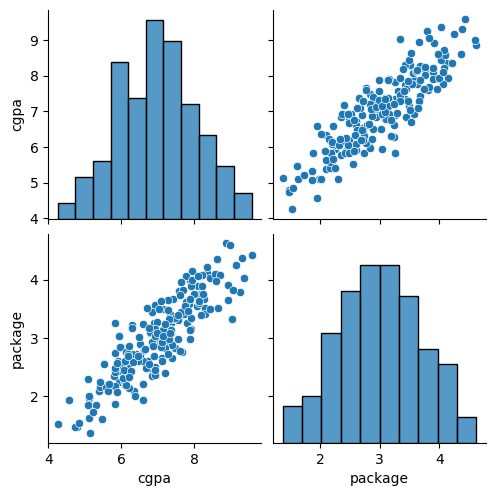

In [8]:
sns.pairplot(data=df,kind="scatter")

In [9]:
x=df.iloc[:,0:1]
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [10]:
y=df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

### Split  Data Into  Training  And Testing

In [11]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=25)

### Model Loading 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()
lr

LinearRegression()

### Model Fitting

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

### Prediction

In [20]:
y_pred=lr.predict(x_test)

In [21]:
y_pred

array([3.32116584, 2.4881404 , 2.19346473, 1.62111392, 2.83381762,
       2.38047045, 3.16816117, 4.34686383, 2.92448706, 2.1027953 ,
       1.99512534, 3.315499  , 3.02649017, 1.93845695, 1.93279011,
       2.59581035, 3.06615805, 4.30719595, 2.42013832, 2.4881404 ,
       4.12585708, 3.74051198, 3.3721674 , 2.95282126, 3.42883579,
       1.7457844 , 2.8451513 , 3.72351146, 2.93582074, 2.39747096,
       2.87915234, 3.02082333, 3.62150834, 2.33513573, 2.91315338,
       3.90485033, 2.76581555, 2.80548342, 3.89351665, 3.53083891])

### Evaluation 

In [22]:
from sklearn import metrics

## 1.r2

In [24]:
metrics.r2_score(y_test,y_pred)    ## y_test-- Actual Answer    y_pred-- own written Answer in exam.

0.8376622340186116

In [25]:
metrics.r2_score(y_pred,y_test)

0.7979492946309154

## 2.Adjr2

In [27]:
def adj_r2(x,y):
    r2=lr.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2


print("Adj r2 for training data",adj_r2(x_train,y_train))

print("Adj r2 for testing data",adj_r2(x_test,y_test))

Adj r2 for training data 0.7529675668631433
Adj r2 for testing data 0.8333901875454172


### 3.Mean Absolute Percentage Error 

In [28]:
print("mean_absolute_error",metrics.mean_absolute_percentage_error(y_test,y_pred))

mean_absolute_error 0.09241973463801342


### 4.Mean Absolute Error

In [29]:
print("mean_absolute_error",metrics.mean_absolute_error(y_test,y_pred))

mean_absolute_error 0.24784164138700185


### 5.Mean Squared Error

In [31]:
print("mean_squared_error",metrics.mean_squared_error(y_test,y_pred))

mean_squared_error 0.09665229385002558


In [32]:
import numpy as np

In [33]:
print("Accuracy of the model",100-(np.mean(np.abs((y_test-y_pred)/y_test))*100))

Accuracy of the model 90.75802653619866


### 6.Median Absolute Percentage Error

In [40]:
MAPE=metrics.mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.09241973463801342

### 7.Root Mean Squared Error

In [43]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE

0.3108895203284047

In [ ]:
If we have no outliers in our data then in hyperparameter tuning to increase the model performance data scientist 
are use RMSE method